In [21]:
# Here we are predicting if and when the stock price will go up and down and on the days it goes up by how much will go up
import yfinance as yf
sp500 = yf.Ticker("^GSPC")

In [22]:
sp500 = sp500.history(period="max")
print(sp500)

                                  Open         High          Low        Close   
Date                                                                            
1927-12-30 00:00:00-05:00    17.660000    17.660000    17.660000    17.660000  \
1928-01-03 00:00:00-05:00    17.760000    17.760000    17.760000    17.760000   
1928-01-04 00:00:00-05:00    17.719999    17.719999    17.719999    17.719999   
1928-01-05 00:00:00-05:00    17.549999    17.549999    17.549999    17.549999   
1928-01-06 00:00:00-05:00    17.660000    17.660000    17.660000    17.660000   
...                                ...          ...          ...          ...   
2023-11-13 00:00:00-05:00  4406.660156  4421.759766  4393.819824  4411.549805   
2023-11-14 00:00:00-05:00  4458.970215  4508.669922  4458.970215  4495.700195   
2023-11-15 00:00:00-05:00  4505.299805  4521.169922  4495.310059  4502.879883   
2023-11-16 00:00:00-05:00  4497.080078  4511.990234  4487.830078  4508.240234   
2023-11-17 00:00:00-05:00  4

In [23]:
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2023-11-06 00:00:00-05:00', '2023-11-07 00:00:00-05:00',
               '2023-11-08 00:00:00-05:00', '2023-11-09 00:00:00-05:00',
               '2023-11-10 00:00:00-05:00', '2023-11-13 00:00:00-05:00',
               '2023-11-14 00:00:00-05:00', '2023-11-15 00:00:00-05:00',
               '2023-11-16 00:00:00-05:00', '2023-11-17 00:00:00-05:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24087, freq=None)

<Axes: xlabel='Date'>

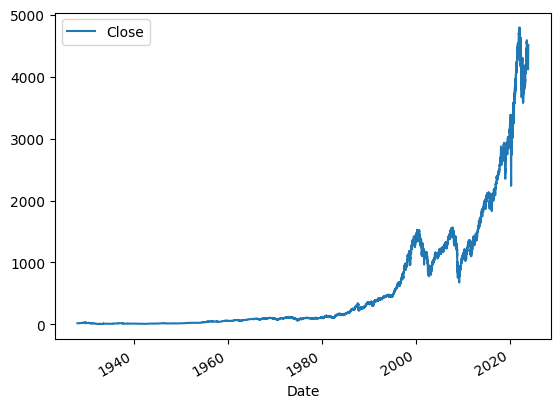

In [24]:
# Cleaning and visualising our dataset
sp500.plot.line(y="Close", use_index=True)

In [25]:
del sp500["Dividends"]
del sp500["Stock Splits"]

In [26]:
sp500["Tomorrow"] = sp500["Close"].shift(-1)
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2023-11-13 00:00:00-05:00,4406.660156,4421.759766,4393.819824,4411.549805,3326240000,4495.700195
2023-11-14 00:00:00-05:00,4458.970215,4508.669922,4458.970215,4495.700195,4700350000,4502.879883
2023-11-15 00:00:00-05:00,4505.299805,4521.169922,4495.310059,4502.879883,4347170000,4508.240234


In [27]:
# the target coloumn will tell us if the price in the tommorow column is greater than the price in the close column 
sp500["Target"] = (sp500["Tomorrow"] >  sp500["Close"]).astype(int)

In [28]:
# Historical data is good but in stock market data the od can be different from the new data due shifts in the market which can skew our model
sp500 = sp500.loc["1990-01-01":].copy()
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2023-11-13 00:00:00-05:00,4406.660156,4421.759766,4393.819824,4411.549805,3326240000,4495.700195,1
2023-11-14 00:00:00-05:00,4458.970215,4508.669922,4458.970215,4495.700195,4700350000,4502.879883,1
2023-11-15 00:00:00-05:00,4505.299805,4521.169922,4495.310059,4502.879883,4347170000,4508.240234,1


In [29]:
# train our initial model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state = 1)

train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [30]:
from sklearn.metrics import precision_score
preds = model.predict(test[predictors])


In [31]:
import pandas as pd
preds= pd.Series(preds, index=test.index)


In [32]:
precision_score(test["Target"], preds)

0.527027027027027

<Axes: xlabel='Date'>

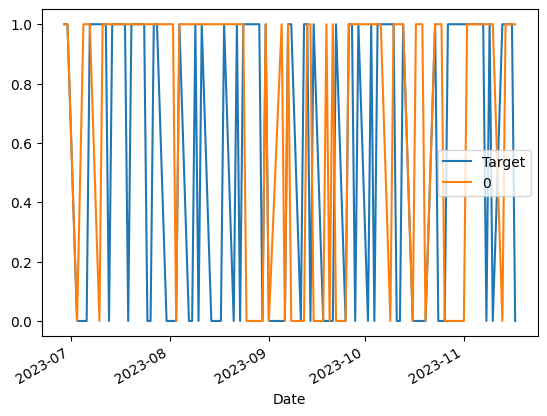

In [33]:
combined = pd.concat([test["Target"], preds], axis=1)
combined.plot()

In [48]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds [ preds >=.6] = 1
    preds[preds<0.6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [38]:
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

In [39]:
predictions = backtest(sp500, model, predictors)
predictions["Predictions"].value_counts()

Predictions
0    3450
1    2587
Name: count, dtype: int64

In [40]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5280247390800155

In [41]:
predictions["Target"].value_counts()/ predictions.shape[0]

Target
1    0.533874
0    0.466126
Name: count, dtype: float64

In [55]:
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
    rolling_average = sp500.rolling(horizon).mean()

    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"] / rolling_average["Close"]

    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]

    new_predictors += [ratio_column, trend_column]

In [57]:
sp500 = sp500.dropna()

In [58]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [59]:
predictions = backtest(sp500, model, new_predictors)

In [60]:
predictions["Predictions"].value_counts()

Predictions
0.0    4210
1.0     826
Name: count, dtype: int64

In [61]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5714285714285714

<Axes: xlabel='Date'>

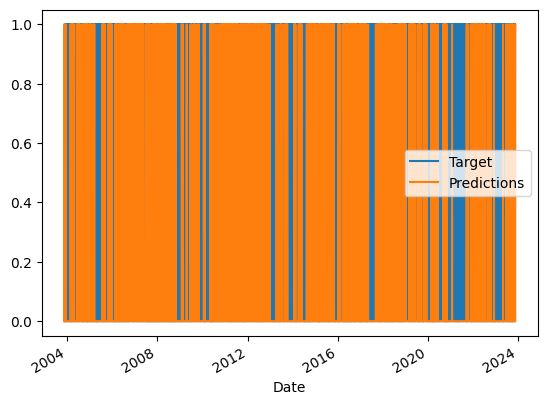

In [63]:
# combined = pd.concat([predictions["Target"], predictions['Predictions']], axis=1)
predictions.plot()